In [1]:
import numpy as np
import data
import calculate as calc
import matplotlib.pyplot as plt
import torch.nn as nn

/home/elliot/miniconda3/envs/mutualinfo/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# Linear Regression Data

In [2]:
linearKraskov = []
linearMine = []
for i in range(1,51,1):
    # Generate Linear Data
    linearData = data.generate_linear_data(stdN=i, N=500)
    # Adding Kraskov Estimate
    linearKraskov.append(calc.kraskov(linearData[0], linearData[1]))
    # Adding MINE Estimate
    dimX, dimY = len(linearData[0][0]), len(linearData[1][0])
    statistics_network = nn.Sequential(nn.Linear(dimX+dimY, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 1))
    mine1 = calc.Mine(T=statistics_network, loss = 'fdiv', method = 'concat')
    # print(len(linearData[0][0]))
    # print(len(linearData[1][0]))
    linearMine.append(mine1.optimize(linearData[0], linearData[1], batch_size=100, iters=100))

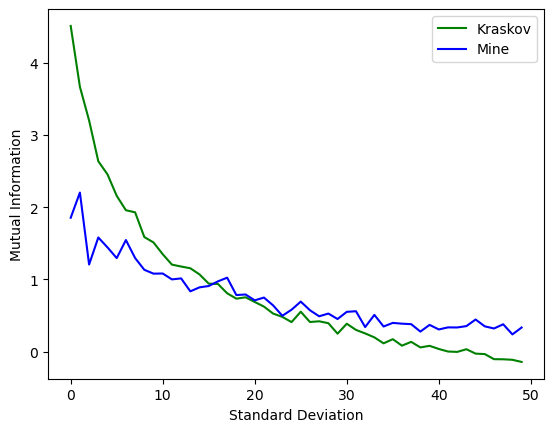

In [3]:
plt.plot(linearKraskov, color="green", linestyle="-", label="Kraskov")
plt.plot(linearMine, color="blue", linestyle="-", label="Mine")
plt.xlabel("Standard Deviation")
plt.ylabel("Mutual Information")
plt.legend()
plt.show()

# Multivariate Gaussian Data (Dim=1)

In [4]:
rhos = np.linspace(-0.99, 0.99, 25)
gaussianTrue1 = []
gaussianKraskov1 = []
gaussianMine1 = []
for rho in rhos:
    # Generate Multivariate Gaussian Data
    gaussianData = data.generate_gaussian_data(rho, dim=1)
    # Adding Kraskov Estimate
    gaussianKraskov1.append(calc.kraskov(gaussianData[0], gaussianData[1]))
    # Adding MINE Estimate
    dimX, dimY = len(gaussianData[0][0]), len(gaussianData[1][0])
    statistics_network = nn.Sequential(nn.Linear(dimX+dimY, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 1))
    mine2 = calc.Mine(T=statistics_network, loss = 'fdiv', method = 'concat')
    gaussianMine1.append(mine2.optimize(gaussianData[0], gaussianData[1], batch_size=100, iters=100))
    # Adding Ground Truth
    gaussianTrue1.append(gaussianData[2])

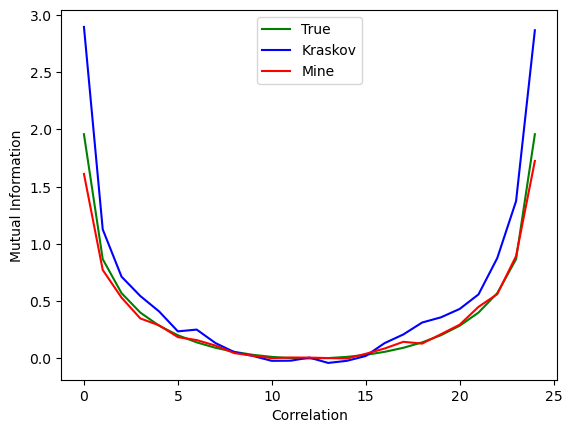

In [5]:
plt.plot(gaussianTrue1, color="green", linestyle="-", label="True")
plt.plot(gaussianKraskov1, color="blue", linestyle="-", label="Kraskov")
plt.plot(gaussianMine1, color="red", linestyle="-", label="Mine")
plt.xlabel("Correlation")
plt.ylabel("Mutual Information")
plt.legend()
plt.show()

# Multivariate Gaussian Data (Dim=40)

In [6]:
rhos = np.linspace(-0.99, 0.99, 25)
gaussianTrue40 = []
gaussianKraskov40 = []
gaussianMine40 = []
for rho in rhos:
    # Generate Multivariate Gaussian Data
    gaussianData = data.generate_gaussian_data(rho, dim=40)
    # Adding Kraskov Estimate
    gaussianKraskov40.append(calc.kraskov(gaussianData[0], gaussianData[1]))
    # Adding MINE Estimate
    dimX, dimY = len(gaussianData[0][0]), len(gaussianData[1][0])
    statistics_network = nn.Sequential(nn.Linear(dimX+dimY, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 100), nn.ReLU(), nn.Linear(100, 1))
    mine3 = calc.Mine(T=statistics_network, loss = 'fdiv', method = 'concat')
    gaussianMine40.append(mine3.optimize(gaussianData[0], gaussianData[1], batch_size=100, iters=100))
    # Adding Ground Truth
    gaussianTrue40.append(gaussianData[2])

/home/elliot/projects/mutualinfo-py/data.py:40: RuntimeWarning: divide by zero encountered in log
  trueMI = -0.5*np.log(np.linalg.det(cov.data))
/home/elliot/projects/mutualinfo-py/data.py:40: RuntimeWarning: divide by zero encountered in log
  trueMI = -0.5*np.log(np.linalg.det(cov.data))


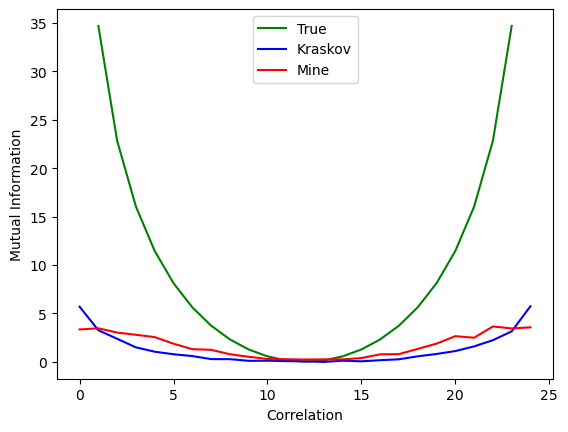

In [7]:
plt.plot(gaussianTrue40, color="green", linestyle="-", label="True")
plt.plot(gaussianKraskov40, color="blue", linestyle="-", label="Kraskov")
plt.plot(gaussianMine40, color="red", linestyle="-", label="Mine")
plt.xlabel("Correlation")
plt.ylabel("Mutual Information")
plt.legend()
plt.show()